[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/carlos-adir/UnB-Courses/blob/main/vibracoes/Exercises5_VariableForce.ipynb)

In [1]:
import numpy as np
try:
    from scipy.integrate import odeint 
except ModuleNotFoundError:
    import os
    os.system("pip install scipy")
    from scipy.integrate import odeint
try:
    from matplolib import pyplot as plt
except ModuleNotFoundError:
    import os
    os.system("pip install matplotlib")
    from matplotlib import pyplot as plt

# Description

This exercise is to see the behavior of a mass-spring-damper system like as show bellow.

![sistema massa mola amortecedor](https://raw.githubusercontent.com/carlos-adir/UnB-Courses/main/vibracoes/img/model-mck.png)

The ODE (Ordinary Differential Equation) for this 1 DOF problem is given by

$$m\ddot{x} + c\dot{x} + kx = f$$

Which applied force $f$ is given by the graph

![graphforce](https://raw.githubusercontent.com/carlos-adir/UnB-Courses/main/vibracoes/img/GraphForce.png)

Where we can write it as

$$
f(t) = \dfrac{f_0}{t_1-t_0} \cdot \text{ramp}(t-t_0) - \dfrac{f_0}{t_1-t_0} \cdot \text{ramp}(t-t_1) - f_0 \cdot \text{step}(t-t_2)
$$


## Divide problem in homogeneous and forced

To solve this ODE with the initial conditions $x(0) = x_0$ and $\dot{x}(0) = v_0$, we use the Laplace transform:

$$
F(s) = \mathcal{L}\left\{f(t)\right\}=\int_{0}^{\infty}f(t) \cdot \exp\left(-st\right)\ dt 
$$

Transforming the ODE into a algebric equation using the laplace transform we get

$$
\left[ms^2+cs+k\right]\cdot X(s) - \left[\left(ms+c\right)x_0 + m \cdot v_0\right] = F(s)
$$

$$
X(s) = \underbrace{\dfrac{ms+c}{ms^2+cs+k}}_{X_{pos}} \cdot x_0 + \underbrace{\dfrac{m}{ms^2 +cs+k}}_{X_{vel}} \cdot v_0 + \underbrace{\dfrac{F(s)}{ms^2+cs+k}}_{X_{forc}}
$$

So, we can decompose the solution in two parts: The **homogeneous**(with initial conditions) and the **forced** solutions.

$$
x(t) = x_{homo}(t) + x_{forc}(t) = \mathcal{L}^{-1}\left\{X_{homo}\right\} + \mathcal{L}^{-1}\left\{X_{forc}\right\}
$$

From [this notebook](https://github.com/carlos-adir/UnB-Courses/blob/main/vibracoes/forcamento-harmonico.ipynb) we can get the homogenous solution which is given by

$$
x_{pos}(t) = \mathcal{L}^{-1}\left\{X_{pos}\right\}  = \exp\left(-\xi \omega_{n}t\right) \left[\cos \left(\mu \omega_{n}t\right) + \dfrac{\xi}{\mu} \sin \left(\mu \omega_{n}t\right)\right]
$$
$$
x_{vel}(t) = \mathcal{L}^{-1}\left\{X_{vel}\right\} = \dfrac{1}{\mu \omega_{n}}\cdot \exp\left(-\xi \omega_{n}t\right)\sin \left(\mu \omega_{n}t\right)
$$
$$
x_{homo}(t) = x_0 \cdot x_{pos}(t) + v_0 \cdot x_{vel}(t)
$$

For the forced solution, we have to dive in more than that.
Our final objective is:

* If $f(t)$ can be decomposed in a sum of 'trivial' functions with constants $a_i$

$$
f(t) = \sum_{i} a_i \cdot f_i(t)
$$

* Then, the final solution is given by

$$
x_{forc}(t) = \sum_{i} a_i \cdot x_{forc,i}(t)
$$

$$
x_{forc, i} = \mathcal{L}^{-1}\left\{\dfrac{1}{ms^2+cs+k} \cdot \mathcal{L}\left\{f_i\right\}\right\}
$$

## Singularity functions

For this problem, we are going to use the [singularity functions](https://en.wikipedia.org/wiki/Singularity_function) $\langle x-a\rangle^{n}$:

$$
\langle x-a \rangle^{-1} \equiv \text{dirac}\left(x-a\right)
$$
$$
\langle x-a \rangle^{0} \equiv \text{step}\left(x-a\right)
$$
$$
\langle x-a \rangle^{1} \equiv \text{ramp}\left(x-a\right)
$$

In general que have

$$
\langle x-a\rangle^{n} = 
\begin{cases}
0 \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \text{if} \ x < a \\
(x-a)^{n} \ \ \ \ \text{if} \ a < x 
\end{cases}
$$

The Laplace Transform of these functions are given by.

$$
\mathcal{L}\left\{\langle t-a\rangle^{-1}\right\} = \int_{0}^{\infty} \langle t-a\rangle^{-1} \cdot \exp\left(-st\right) \ dt = \exp \left(-sa\right)
$$
$$
\mathcal{L}\left\{\langle t-a\rangle^{0}\right\} = \int_{0}^{\infty} \langle t-a\rangle^{0} \cdot \exp\left(-st\right) \ dt = \cdots = \dfrac{\exp \left(-sa\right)}{s}
$$
$$
\mathcal{L}\left\{\langle t-a\rangle^{1}\right\} = \int_{0}^{\infty} \langle t-a\rangle^{1} \exp\left(-st\right) \ dt = \cdots =\dfrac{\exp \left(-sa\right)}{s^2}
$$

## Solution of base functions

### Step function

For the step function centered on the origin ($a=0$) the ODE is given by 

$$
m\ddot{x} + c\dot{x} + kx = \langle t-a \rangle^{0}
$$

Transforming it to Laplace we get

$$
X_{step}(s) = \dfrac{1}{ms^2+cs+k} \cdot \dfrac{\exp \left(-sa\right)}{s}
$$

Then we can decompose it using partial fractions

$$
\dfrac{\exp (-sa)}{s} \cdot \dfrac{1}{ms^2+cs+k} = \dfrac{\exp(-sa)}{k} \left[ \dfrac{1}{s} - \underbrace{\dfrac{ms+c}{ms^2+cs+k}}_{X_{pos}} \right]
$$

Then the solution $x_{step}(t)$ is given by

$$
x_{step}(t) = \dfrac{1}{k}\mathcal{L}^{-1}\left\{\dfrac{\exp \left(-sa\right)}{s}\right\} - \dfrac{1}{k}\mathcal{L}^{-1}\left\{\exp \left(-sa\right)\cdot X_{pos}\right\}
$$

$$
x_{step}(t) = \dfrac{\langle t-a\rangle^{0}}{k} - \dfrac{\langle t-a \rangle^{0}}{k} x_{pos}(t-a)
$$

### Ramp function

For the ramp

$$
m\ddot{x} + c\dot{x} + kx = \langle t-a\rangle ^{1}
$$

$$
X_{ramp}(s) = \dfrac{1}{ms^2+cs+k} \cdot \dfrac{\exp \left(-sa\right)}{s^2}
$$

Making the partial fractions

$$
\dfrac{1}{s^2} \cdot \dfrac{1}{ms^2+cs+k} = \dfrac{1}{k} \cdot \left(\dfrac{1}{s^2}\right) - \dfrac{c}{k^2} \cdot \left(\dfrac{1}{s}\right) + \dfrac{c}{k^2} \cdot \underbrace{\left(\dfrac{ms + c}{ms^2+cs+k}\right)}_{X_{pos}} - \dfrac{1}{k} \cdot \underbrace{\left(\dfrac{m}{ms^2+cs+k}\right)}_{X_{vel}}
$$

$$
X_{ramp} = \dfrac{1}{k} \cdot \left(\dfrac{\exp(-sa)}{s^2}\right) - \dfrac{c}{k} X_{step} - \dfrac{1}{k} \cdot \exp(-sa) X_{vel}
$$

Then the solution is 

$$
x_{ramp}(t) = \dfrac{\langle t-a\rangle^{1}}{k} - \dfrac{c}{k}x_{step}(t) - \dfrac{\langle t-a\rangle^{0}}{k} \cdot x_{vel}(t-a)
$$



In [2]:
import sympy as sp

m, c, k = sp.symbols("m c k")
s = sp.symbols("s")

Xpos = (m*s+c)/(m*s**2+c*s+k)
Xvel = m/(m*s**2+c*s+k)
expr = 1/(k*s**2)
expr -= c/(s*k**2)
expr += (c/k**2)*Xpos
expr -= (1/k)*Xvel
expr *= (m*s**2+c*s+k)
expr *= s**2
expr = sp.simplify(expr)
expr = sp.expand(expr)
print(expr)

1


## Find final solution

From the top whe have that, with $a=0$ the base functions become

$$
x_{pos}(t) = \exp\left(-\xi \omega_{n}t\right) \left[\cos \left(\mu \omega_{n}t\right) + \dfrac{\xi}{\mu} \sin \left(\mu \omega_{n}t\right)\right]
$$
$$
x_{vel}(t) = \dfrac{1}{\mu \omega_{n}}\cdot \exp\left(-\xi \omega_{n}t\right)\sin \left(\mu \omega_{n}t\right)
$$
$$
x_{step}(t) = \dfrac{\langle t\rangle^{0}}{k} - \dfrac{\langle t\rangle^{0}}{k} x_{pos}(t)
$$
$$
x_{ramp}(t) = \dfrac{\langle t\rangle^{1}}{k} - \dfrac{c}{k} x_{step}(t) + \dfrac{\langle t\rangle^{0}}{k} \cdot x_{vel}(t)
$$

As we can rewrite 

$$
f(t) = \dfrac{f_0}{t_1-t_0} \cdot \langle t-t_0\rangle^{1} - \dfrac{f_0}{t_1-t_0} \langle t-t_1\rangle^{1} - f_0 \cdot \langle t-t_2\rangle^{0}
$$

Then the final solution is given by

$$
x_{homo}(t) = x_0 \cdot x_{pos}(t) + v_0 \cdot x_{vel}(t)
$$

$$
x_{forc}(t) = \dfrac{f_0}{t_1-t_0} \cdot x_{ramp}(t-t_0) - \dfrac{f_0}{t_1-t_0} \cdot x_{ramp}(t-t_1) - f_0 \cdot x_{step}(t-t_2)
$$

$$
x(t) = x_{homo}(t) + x_{forc}(t)
$$


## Implement numerical solution

In [3]:
def solution_xpos(m: float, c: float, k: float, t):
    wn = np.sqrt(k/m)
    xi = c/(2*np.sqrt(k*m))
    mu = np.sqrt(1-xi**2)
    return np.exp(-xi*wn*t)*(np.cos(mu*wn*t) + (xi/mu)*np.sin(mu*wn*t))

def solution_xvel(m: float, c: float, k: float, t):
    wn = np.sqrt(k/m)
    xi = c/(2*np.sqrt(k*m))
    mu = np.sqrt(1-xi**2)
    return np.exp(-xi*wn*t)*np.sin(mu*wn*t)/(mu*wn)

def solution_step(m: float, c: float, k: float, t):
    mask = t > 0
    xpos = solution_xpos(m, c, k, t)
    values = (1 - xpos)/k
    return mask*values

def solution_ramp(m: float, c: float, k: float, t):
    mask = t > 0
    xstep = solution_step(m, c, k, t)
    xvel = solution_xvel(m, c, k, t)
    values = (t/k) - (c/k)*xstep - (1/k)*xvel
    return mask*values

In [4]:
k = 10  # Spring constant
m = 10  # Mass constant
c = 1.2  # Damper constant
print("Initial parameters:")
print("    m = %.3f kg" % m)
print("    c = %.3f N*s/m" % c)
print("    k = %.3f N/m" % k)

Initial parameters:
    m = 10.000 kg
    c = 1.200 N*s/m
    k = 10.000 N/m


In [5]:
xi = c/(2*np.sqrt(k*m))
mu = np.sqrt(1-xi**2)
wn = np.sqrt(k/m)
print("Parameters:")
print("   xi = %.3f" % xi)
print("   mu = %.3f" % mu)
print("   wn = %.3f rad/s" % wn)

Parameters:
   xi = 0.060
   mu = 0.998
   wn = 1.000 rad/s


In [6]:
x0 = 1
v0 = -0.3
print("Initial time:")
print("    Position = x0 = %.3f" % x0)
print("       Speed = v0 = %.3f" % v0)

Initial time:
    Position = x0 = 1.000
       Speed = v0 = -0.300


In [7]:
f0 = 10
t0, t1, t2 = 1, 2, 3
print("Force parameters")
print("    f0 = %.3f" % f0)
print("    t0 = %.3f" % t0)
print("    t1 = %.3f" % t1)
print("    t2 = %.3f" % t2)

Force parameters
    f0 = 10.000
    t0 = 1.000
    t1 = 2.000
    t2 = 3.000


In [8]:
def f(t):
    if t < t0:
        return 0
    if t < t1:
        return f0 * (t-t0)/(t1-t0)
    if t < t2:
        return f0
    return 0

MAT = np.array([[0, 1],
                [-k/m, -c/m]])
VEC = np.zeros(2)
def dydt(y, t):
    VEC[1] = f(t)/m
    return MAT @ y + VEC
y0 = np.array([x0, v0])
npts = 10250
t = np.linspace(0, max(t2, 50), npts)
Ynum = odeint(dydt, y0, t)

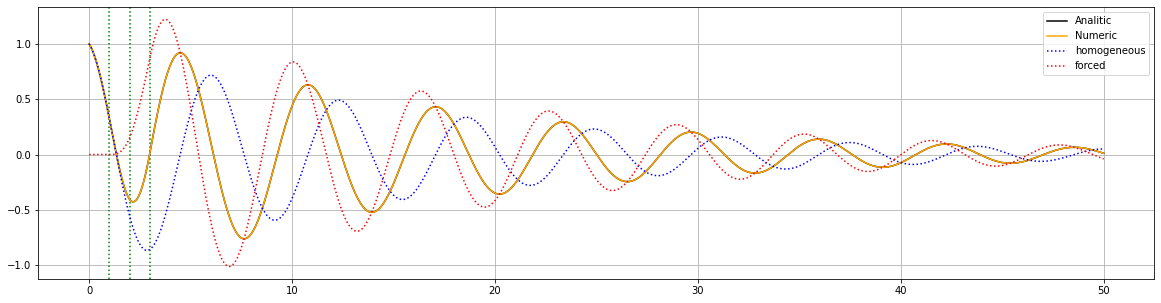

In [9]:
xpos = solution_xpos(m, c, k, t)
xvel = solution_xvel(m, c, k, t)
xhomo = x0*xpos + v0*xvel
df0 = f0/(t1-t0)
xforc0 = df0*solution_ramp(m, c, k, t-t0)
xforc1 = -df0*solution_ramp(m, c, k, t-t1)
xforc2 = -f0*solution_step(m, c, k, t-t2) 
xforc = xforc0 + xforc1 + xforc2
plt.figure(figsize=(20, 5))
for ti in [t0, t1, t2]:
    plt.axvline(x=ti, ls="dotted", color="g")
plt.plot(t, xhomo+xforc, color="k", label="Analitic")
plt.plot(t, Ynum[:, 0], color="orange", label="Numeric")
plt.plot(t, xhomo, ls="dotted", color="b", label="homogeneous")
plt.plot(t, xforc, ls="dotted", color="r", label="forced")
plt.legend()
plt.grid()

## Online available

This python notebook is available online in GitHub on the link:

* [GitHub/carlos-adir/UnB-Courses/vibracoes/Exercises5_VariableForce](https://github.com/carlos-adir/UnB-Courses/blob/main/vibracoes/Exercises5_VariableForce.ipynb)